In [37]:
import numpy as np # Importo algebra Lineal
import matplotlib.pyplot as plt # Importo librería de gráficos 
import copy


Calcule las frecuencias naturales de oscilación transversal de una barra de acero (densidad 7850
kg/m3 y módulo de elasticidad E = 210 GPa), de 1 m de longitud, 10 cm2
 de área, momento de
inercia de 10 cm4
. Realice el cálculo para un número variable de elementos y estudie la convergencia
de sus resultados. 


Haga el cálculo para matrices de masa concentrada y consistente. Grafique los
desplazamientos en función de la posición para los primeros modos normales

In [38]:
def oscilaciones(elementos,valor):

    densidad=7850
    E=210E9
    Ltotal=1 #metro
    area=10E-4
    I=10E-8 #Momento de Inercia
    #elementos=3
    #valor=1

    numeronodos=elementos+1

    #Defino las condiciones de vinculo

    s=[0,1] #Nodo 1, cero desplazamiento vertical y angulo
    r=np.linspace(2,2*numeronodos-1,2*numeronodos-2).astype(int) #Nodos sin condicion de contorno
    

    #Empieza el programa
    #Defino el numero de nodos


    matriz_nodos=np.linspace(0,Ltotal,numeronodos).reshape(-1,1)
    MN=np.hstack([matriz_nodos,np.zeros_like(matriz_nodos)])
    #print(MN)


    #Creo la matriz conectvidad

    MC=np.zeros((numeronodos,2))
    aux1=-1
    aux2=0

    for i in range(numeronodos):
        aux1+=1
        aux2+=1
        MC[i,0]=aux1
        MC[i,1]=aux2

    Mc=MC.astype(int) 

    #creo las matrices

    Matrizglobal_rigidez=np.zeros((2*numeronodos,2*numeronodos))
    Matrizglobal_concentrada=np.zeros((2*numeronodos,2*numeronodos))
    L=Ltotal/elementos


    for i in range(elementos):

        #Matriz rigidez

        p,j = MC[i]
        Matriz = np.array([[12, 6*L, -12, 6*L],
                           [6*L, 4*L**2, -6*L, 2*L**2],
                           [-12 , -6*L, 12, -6*L],
                           [6*L,2*L**2,-6*L, 4* L**2]])

        coeficiente=(E*I)/(L**3)
        componente = coeficiente*Matriz

        A_G = np.array([p*2,p*2+1]).astype(int)
        B_G = np.array([j*2,j*2+1]).astype(int)
        A_L = np.array([0,1]).astype(int)
        B_L = np.array([2,3]).astype(int)

        Matrizglobal_rigidez[np.ix_(A_G,A_G)] =  componente [np.ix_(A_L,A_L)]+Matrizglobal_rigidez[np.ix_(A_G,A_G)]
        Matrizglobal_rigidez[np.ix_(B_G,B_G)] =  componente [np.ix_(B_L,B_L)]+Matrizglobal_rigidez[np.ix_(B_G,B_G)]
        Matrizglobal_rigidez[np.ix_(A_G,B_G)] =  componente [np.ix_(A_L,B_L)]+Matrizglobal_rigidez[np.ix_(A_G,B_G)]
        Matrizglobal_rigidez[np.ix_(B_G,A_G)] =  componente [np.ix_(B_L,A_L)]+ Matrizglobal_rigidez[np.ix_(B_G,A_G)]


        #Matriz concentrada, si valor=1 matriz concentrada, si valor=0 matriz consistente
        
        if valor==1:
            
            Matriz = np.array([[12, 0, 0, 0],
                               [0, L**2, 0, 0],
                               [0, 0, 12, 0],
                               [0, 0, 0, L**2]])

            coeficiente=(densidad*area*L)/24
            componente = coeficiente*Matriz

            A_G = np.array([p*2,p*2+1],dtype = int)
            B_G = np.array([j*2,j*2+1],dtype = int) 
            A_L = np.array([0,1],dtype = int)
            B_L = np.array([2,3],dtype = int)

            Matrizglobal_concentrada[np.ix_(A_G,A_G)] =  componente [np.ix_(A_L,A_L)]+Matrizglobal_concentrada[np.ix_(A_G,A_G)]
            Matrizglobal_concentrada[np.ix_(B_G,B_G)] =  componente [np.ix_(B_L,B_L)]+Matrizglobal_concentrada[np.ix_(B_G,B_G)] 
            Matrizglobal_concentrada[np.ix_(A_G,B_G)] =  componente [np.ix_(A_L,B_L)]+Matrizglobal_concentrada[np.ix_(A_G,B_G)]
            Matrizglobal_concentrada[np.ix_(B_G,A_G)] =  componente [np.ix_(B_L,A_L)]+Matrizglobal_concentrada[np.ix_(B_G,A_G)]
            
        elif valor==0:

            Matriz = np.array([[156,22*L, 54*L, -13*L],
                               [22*L,4*L**2, 13*L, -3*L**2],
                               [54,13*L, 156, -22*L],
                               [-13*L,-3*L**2, -22*L, 4*L**2]])

            coeficiente=(densidad*area*L)/420
            componente = coeficiente*Matriz

            A_G = np.array([p*2,p*2+1],dtype = int)
            B_G = np.array([j*2,j*2+1],dtype = int) 
            A_L = np.array([0,1],dtype = int)
            B_L = np.array([2,3],dtype = int)

            Matrizglobal_concentrada[np.ix_(A_G,A_G)] =  componente [np.ix_(A_L,A_L)]+Matrizglobal_concentrada[np.ix_(A_G,A_G)]
            Matrizglobal_concentrada[np.ix_(B_G,B_G)] =  componente [np.ix_(B_L,B_L)]+Matrizglobal_concentrada[np.ix_(B_G,B_G)]
            Matrizglobal_concentrada[np.ix_(A_G,B_G)] =  componente [np.ix_(A_L,B_L)]+Matrizglobal_concentrada[np.ix_(A_G,B_G)]
            Matrizglobal_concentrada[np.ix_(B_G,A_G)] =  componente [np.ix_(B_L,A_L)]+Matrizglobal_concentrada[np.ix_(B_G,A_G)]
            



    #print(Matrizglobal_rigidez)
    #print('')
    #print(Matrizglobal_concentrada)



    from scipy.linalg import eigh

    w,vl_r=eigh(Matrizglobal_rigidez[np.ix_(r,r)],Matrizglobal_concentrada[np.ix_(r,r)])


    #Frecuencias de resonancia

    frecuencia=np.sqrt(w)/(2*np.pi)
    #print(frecuencia)


    #Autovalores, nodo 1 esta empotrado a la pared

    #Los impares son los que mas van a dar desplazamiento, va a ser proporcional a la altura, va seguir siendo un nodo normal
    #los pares me dan el angulo

    vl=np.vstack([np.zeros((2,2*(numeronodos-1))),vl_r])
    #print(vl)


    vl_normalizado=vl/vl[2*numeronodos-2,:]
    #print(vl_normalizado)



    return frecuencia,vl_normalizado



In [39]:
#Voy a graficar aca, frecuencia

#Los graficos los voy a hacer con 15 elementos para la matriz concentrada

fconcentrada=[]
vlconcentrada=[]

for i in range(1,16):
    frecuencia,vlnormalizado=oscilaciones(i,1)
    fconcentrada.append(frecuencia)
    vlconcentrada.append(vlnormalizado)
    
#Los graficos los voy a hacer con 10 elementos para la matriz concentrada

fconsistente=[]
vlconsistente=[]

for i in range(1,16):
    
    frecuencia,vlnormalizado=oscilaciones(i,0)
    fconsistente.append(frecuencia)
    vlconsistente.append(vlnormalizado)
    

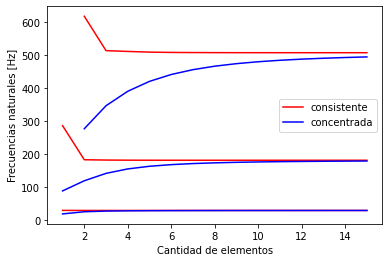

<Figure size 720x432 with 0 Axes>

In [40]:
#Vamos a hacer los graficos

x=np.linspace(1,15,15).astype(int)
lenx=len(x)


#las frecuencias naturales de oscilacion
f1concen=[]
f2concen=[]
f3concen= []

f1consis=[]
f2consis=[]
f3consis=[]

for i in range(0,15): #0 corresponde a 1 elementos, 1 corresponde a 2 elementos


    if i==0:      #Para 1 elementos no hay f3
        aux1=fconcentrada[i]
        aux2=fconsistente[i]
        f1concen.append(aux1[0])
        f2concen.append(aux1[1])    
        f1consis.append(aux2[0])
        f2consis.append(aux2[1])    
    elif i>=0:
        aux1=fconcentrada[i]
        aux2=fconsistente[i]
        f1concen.append(aux1[0])
        f2concen.append(aux1[1])    
        f3concen.append(aux1[2])
        f1consis.append(aux2[0])
        f2consis.append(aux2[1])    
        f3consis.append(aux2[2]) 


        
        
plt.plot(x,f1consis,'r', label='consistente')
plt.plot(x,f2consis,'r')
plt.plot(x[1:lenx],f3consis,'r')
plt.plot(x,f1concen,'b', label='concentrada')
plt.plot(x,f2concen,'b')
plt.plot(x[1:lenx],f3concen,'b')

plt.legend(loc = 'center right')
plt.ylabel('Frecuencias naturales [Hz]')
plt.xlabel('Cantidad de elementos')
plt.show()

plt.figure(figsize=(10,6))
plt.show()    




Text(0, 0.5, 'Autovectores normalizados')

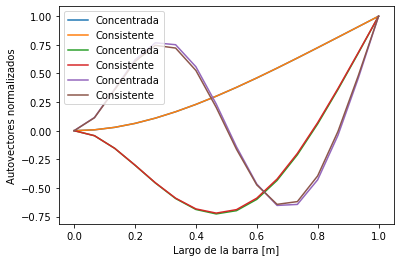

In [41]:
#Voy a graficar aca, modos normales de vibracion
#Me tengo que quedar con las componentes impares de los autovectores, que en phyton serian las pares

cantidadmodos=3 # 0 significa 1 modo, 2 significa 3 modos
elementos=15
largo=1

auxconsis=vlconsistente[elementos-1]
auxconcen=vlconcentrada[elementos-1]

#Me tengo que quedar solo con los impares

despconsis= auxconsis[::2]  
despconcen= auxconcen[::2]

# las posiciones van a ser los nodos en x.
x=np.linspace(0,largo,elementos+1)


for i in range(cantidadmodos):
    consistente= despconsis[:, i]
    concentrada = despconcen[:, i]
    plt.plot(x,concentrada, label='Concentrada')
    plt.plot(x,consistente, label='Consistente')

plt.legend()
plt.xlabel('Largo de la barra [m]')
plt.ylabel('Autovectores normalizados')



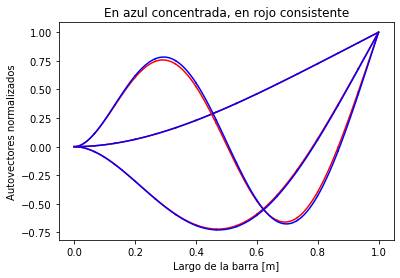

In [42]:
#Voy a graficar aca, modos normales de vibracion, diviendo la barra en diversos elementos,pero con la funcion interpolacion
#Distintos modos para la barra

elementos=15
cantidadmodos=3
    
aux1=vlconsistente[elementos-1]
aux2=vlconcentrada[elementos-1]

largo=1
    
#Me tengo que quedar solo con los pares que son los modos de vibracion transversales

v = lambda a1,a2,a3,a4,x: a1*x**3 + a2*x**2 + a3*x + a4

for j in range(cantidadmodos): #Recorre cada autovector, cantidad de autovectores que quiere recorrer, 0 es 1, 1 es 2
    L=largo/elementos
    for i in range(elementos):
        
        # consistente
        A1 = 2/L**3*(aux1[2*i,j] - aux1[2*(i + 1),j]) + 1/L**2*(aux1[2*i + 1,j] + aux1[2*(i + 1) + 1,j])
        A2 = - 3/L**2*(aux1[2*i,j] - aux1[2*(i + 1),j]) - 1/L*(2*aux1[2*i + 1,j] + aux1[2*(i + 1) + 1,j])
        A3 = aux1[2*i + 1,j]
        A4 = aux1[2*i,j]
        
        #Concentrada
        
        B1 = 2/L**3*(aux2[2*i,j] - aux2[2*(i + 1),j]) + 1/L**2*(aux2[2*i + 1,j] + aux2[2*(i + 1) + 1,j])
        B2 = - 3/L**2*(aux2[2*i,j] - aux2[2*(i + 1),j]) - 1/L*(2*aux2[2*i + 1,j] + aux2[2*(i + 1) + 1,j])
        B3 = aux2[2*i + 1,j]
        B4 = aux2[2*i,j]
        
        
        plt.plot(np.linspace(i*L, (i+1)*L, 20), v(A1, A2, A3, A4, np.linspace(0, L, 20)),'r')
        plt.plot(np.linspace(i*L, (i+1)*L, 20), v(B1, B2, B3, B4, np.linspace(0, L, 20)),'b')
        plt.ylabel('Autovectores normalizados')
        plt.xlabel('Largo de la barra [m]')
        plt.title('En azul concentrada, en rojo consistente')



                
                     

In [43]:
#Voy a graficar aca, modos normales de vibracion, diviendo la barra en diversos elementos,pero con la funcion interpolacion
#Distintos modos para la barra


def graficomodos(elementos,cantidaddemodos):
    
    aux=vlconsistente[elementos-1]
    largo=1
    
    #Me tengo que quedar solo con los pares que son los modos de vibracion transversales

    v = lambda a1,a2,a3,a4,x: a1*x**3 + a2*x**2 + a3*x + a4

    for j in range(cantidaddemodos): #Recorre cada autovector, cantidad de autovectores que quiere recorrer, 0 es 1, 1 es 2
        L=largo/elementos
        for i in range(elementos):
            A1 = 2/L**3*(aux[2*i,j] - aux[2*(i + 1),j]) + 1/L**2*(aux[2*i + 1,j] + aux[2*(i + 1) + 1,j])
            A2 = - 3/L**2*(aux[2*i,j] - aux[2*(i + 1),j]) - 1/L*(2*aux[2*i + 1,j] + aux[2*(i + 1) + 1,j])
            A3 = aux[2*i + 1,j]
            A4 = aux[2*i,j]
            plt.plot(np.linspace(i*L, (i+1)*L, 20), v(A1, A2, A3, A4, np.linspace(0, L, 20)), 'k')
            plt.ylabel('Autovectores normalizados')
            plt.xlabel('Largo de la barra [m]')
            


    return plt.show()




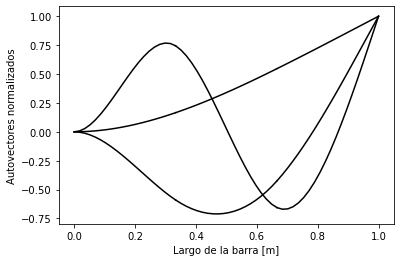

In [44]:
# 3 elementos, 3 modos
graficomodos(3,3)   
